In [2]:
options(warn=-1)

In [3]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(grafify)
library(patchwork)
library(facefuns)
library(ggiraphExtra)
library(RColorBrewer)

#### Figure 4A

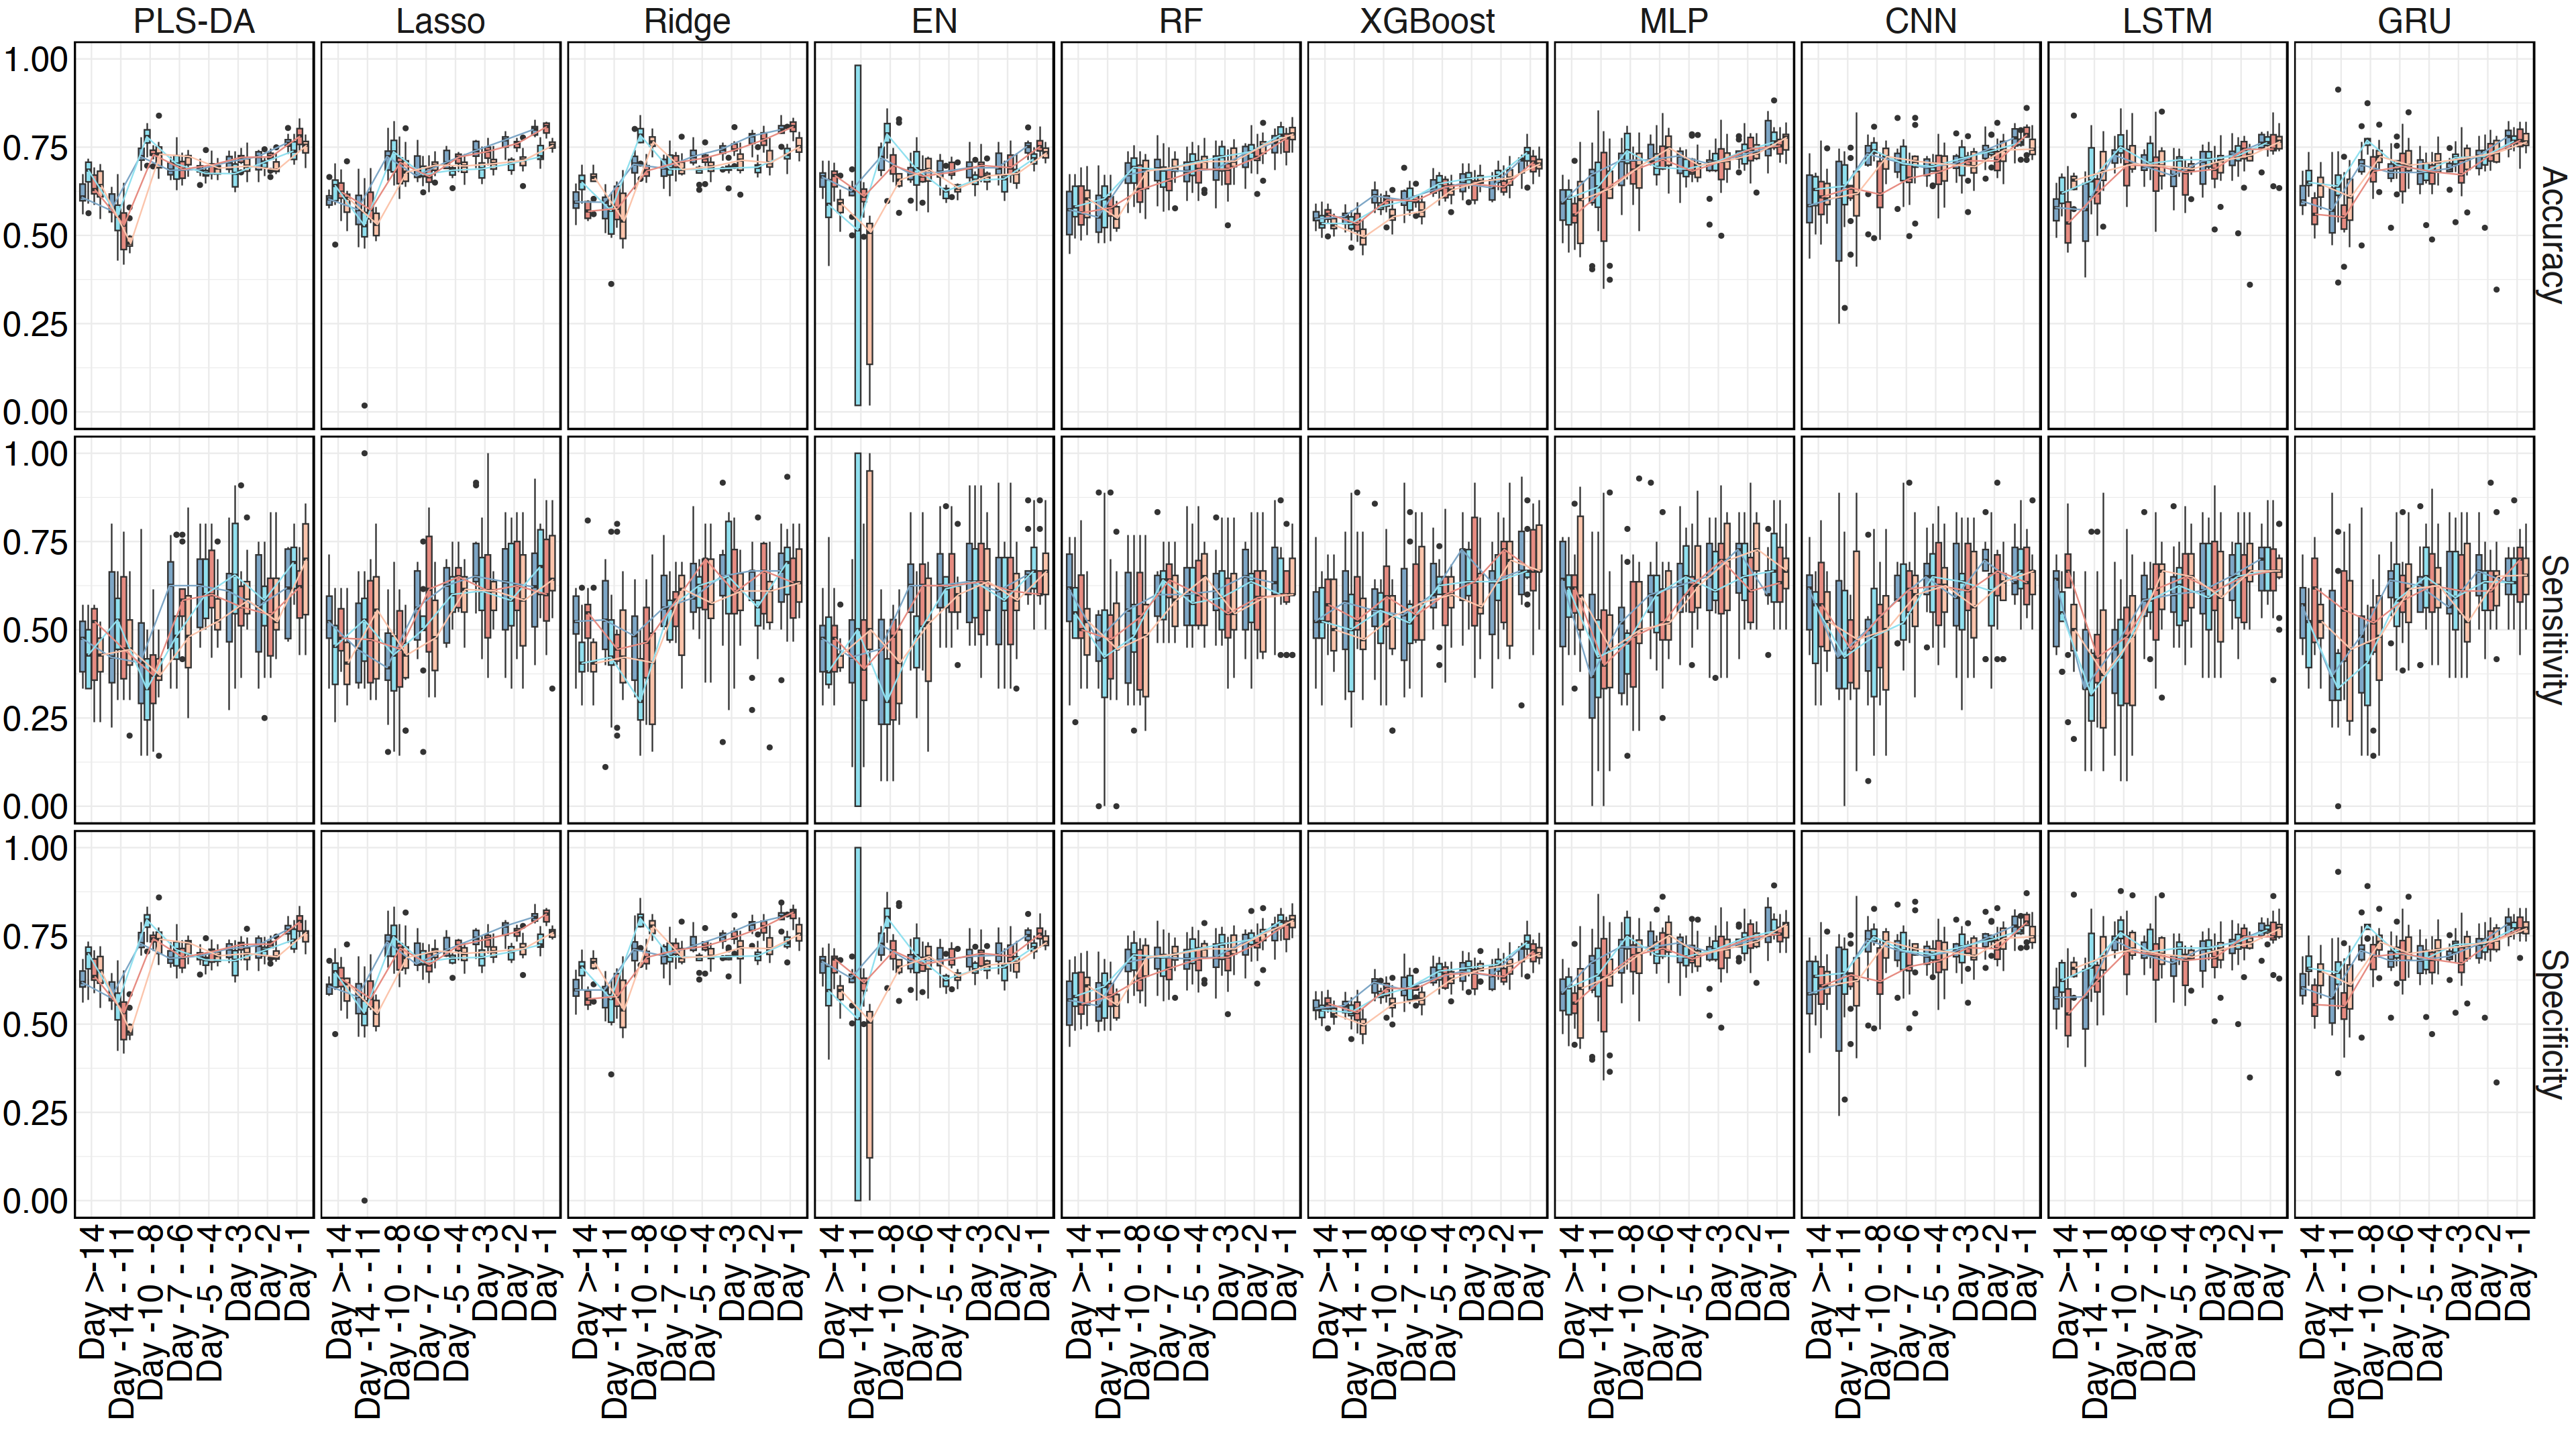

In [7]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=30),
    axis.text.y = element_text(colour = "black", size = 30, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 30, angle = 90, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 1.2),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results1_1031.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -day)

options(repr.plot.width=32, repr.plot.height=18)
data$model <- factor(data$model, levels=c('PLS-DA', 'Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
data$day <- factor(data$day, levels=c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1"))
data$para <- factor(data$para, levels=c('partial_spc', 'partial_1d', 'whole_spc', 'whole_1d'))
ggplot(data, aes(x=day, y=value, fill=para)) + 
  geom_boxplot(position=position_dodge(0.8)) +
  stat_summary(fun.y = median, geom = 'line', aes(group = para, color = para), position = position_dodge(width = 0.9)) +
  scale_x_discrete(labels = c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1")) +
  scale_fill_manual(values=c('#7DA6C6', '#90e0ef', '#E68B81', '#fbc4ab')) + 
  scale_color_manual(values=c('#7DA6C6', '#90e0ef', '#E68B81', '#fbc4ab')) + 
  facet_grid(rows = vars(metrics), cols = vars(model)) +
  ylim(0, 1) +
  main_theme

#### Figure 4B

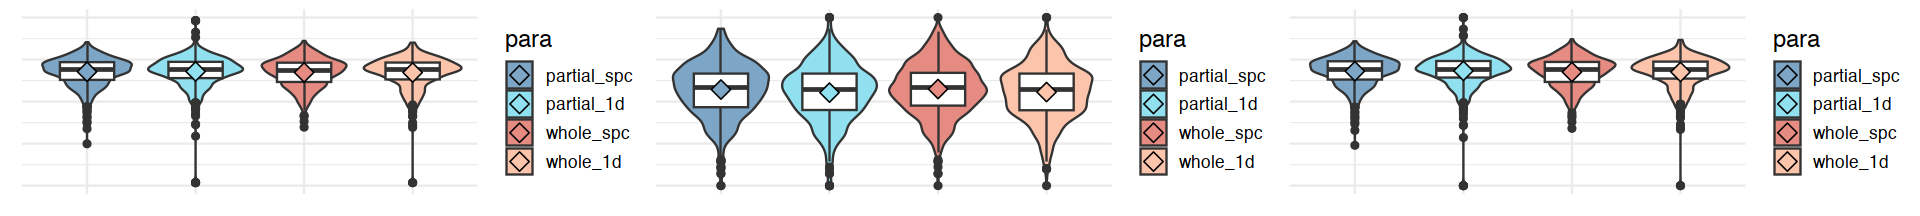

In [5]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=30),
    axis.text.y = element_text(colour = "black", size = 0, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle = 90, vjust = 0.5, hjust = 0.5), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results1_1031.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -day)

data_a <- data %>% filter(metrics == 'Accuracy')
data_a$para <- factor(data_a$para, levels=c('partial_spc', 'partial_1d', 'whole_spc', 'whole_1d'))
p1 <- ggplot(data_a, aes(x=para, y=value, fill=para)) + 
scale_fill_manual(values=c('#7DA6C6', '#90e0ef', '#E68B81', '#fbc4ab')) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  main_theme

data_s <- data %>% filter(metrics == 'Sensitivity')
data_s$para <- factor(data_s$para, levels=c('partial_spc', 'partial_1d', 'whole_spc', 'whole_1d'))
p2 <- ggplot(data_s, aes(x=para, y=value, fill=para)) + 
scale_fill_manual(values=c('#7DA6C6', '#90e0ef', '#E68B81', '#fbc4ab')) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  main_theme

data_s <- data %>% filter(metrics == 'Specificity')
data_s$para <- factor(data_s$para, levels=c('partial_spc', 'partial_1d', 'whole_spc', 'whole_1d'))
p3 <- ggplot(data_s, aes(x=para, y=value, fill=para)) + 
scale_fill_manual(values=c('#7DA6C6', '#90e0ef', '#E68B81', '#fbc4ab')) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  main_theme

options(repr.plot.width=16, repr.plot.height=1.8)
p1 + p2 + p3 + plot_layout(nrow = 1)

#### Figure 4C

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.


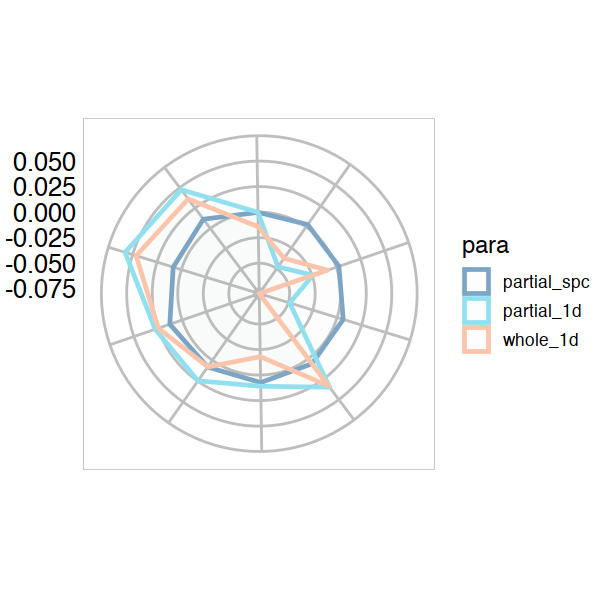

In [6]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=15),
    axis.text.y = element_text(colour = "black", size = 15, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle = 0, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.grid.major = element_line(colour = "grey", size = 0.6),
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.05),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results1_1031.csv', sep = ",", header = T, row.names = NULL)
data <- subset(data, select = c(Accuracy, model, para))
colnames(data) <- c('value', 'model', 'para')
data <- data %>% group_by(model, para) %>% 
  summarise(mean=mean(value))

data_plsda <- data %>% filter(model == 'PLS-DA')
data_plsda$mean = (data_plsda$mean - data_plsda[data_plsda$para == 'whole_spc', 'mean', drop = TRUE])/data_plsda[data_plsda$para == 'whole_spc', 'mean', drop = TRUE] 
data_plsda <- data_plsda %>% filter(para != 'whole_spc')
data_plsda <- subset(data_plsda, select = c(para, mean))
colnames(data_plsda) <- c('para', 'value')
data_plsda$group <- 'PLS-DA'

data_lasso <- data %>% filter(model == 'Lasso')
data_lasso$mean = (data_lasso$mean - data_lasso[data_lasso$para == 'whole_spc', 'mean', drop = TRUE])/data_lasso[data_lasso$para == 'whole_spc', 'mean', drop = TRUE] 
data_lasso <- data_lasso %>% filter(para != 'whole_spc')
data_lasso <- subset(data_lasso, select = c(para, mean))
colnames(data_lasso) <- c('para', 'value')
data_lasso$group <- 'Lasso'

data_ridge <- data %>% filter(model == 'Ridge')
data_ridge$mean = (data_ridge$mean - data_ridge[data_ridge$para == 'whole_spc', 'mean', drop = TRUE])/data_ridge[data_ridge$para == 'whole_spc', 'mean', drop = TRUE] 
data_ridge <- data_ridge %>% filter(para != 'whole_spc')
data_ridge <- subset(data_ridge, select = c(para, mean))
colnames(data_ridge) <- c('para', 'value')
data_ridge$group <- 'Ridge'

data_en <- data %>% filter(model == 'EN')
data_en$mean = (data_en$mean - data_en[data_en$para == 'whole_spc', 'mean', drop = TRUE])/data_en[data_en$para == 'whole_spc', 'mean', drop = TRUE] 
data_en <- data_en %>% filter(para != 'whole_spc')
data_en <- subset(data_en, select = c(para, mean))
colnames(data_en) <- c('para', 'value')
data_en$group <- 'EN'

data_rf <- data %>% filter(model == 'RF')
data_rf$mean = (data_rf$mean - data_rf[data_rf$para == 'whole_spc', 'mean', drop = TRUE])/data_rf[data_rf$para == 'whole_spc', 'mean', drop = TRUE] 
data_rf <- data_rf %>% filter(para != 'whole_spc')
data_rf <- subset(data_rf, select = c(para, mean))
colnames(data_rf) <- c('para', 'value')
data_rf$group <- 'RF'

data_xgboost <- data %>% filter(model == 'XGBoost')
data_xgboost$mean = (data_xgboost$mean - data_xgboost[data_xgboost$para == 'whole_spc', 'mean', drop = TRUE])/data_xgboost[data_xgboost$para == 'whole_spc', 'mean', drop = TRUE] 
data_xgboost <- data_xgboost %>% filter(para != 'whole_spc')
data_xgboost <- subset(data_xgboost, select = c(para, mean))
colnames(data_xgboost) <- c('para', 'value')
data_xgboost$group <- 'XGBoost'

data_mlp <- data %>% filter(model == 'MLP')
data_mlp$mean = (data_mlp$mean - data_mlp[data_mlp$para == 'whole_spc', 'mean', drop = TRUE])/data_mlp[data_mlp$para == 'whole_spc', 'mean', drop = TRUE] 
data_mlp <- data_mlp %>% filter(para != 'whole_spc')
data_mlp <- subset(data_mlp, select = c(para, mean))
colnames(data_mlp) <- c('para', 'value')
data_mlp$group <- 'MLP'

data_cnn <- data %>% filter(model == 'CNN')
data_cnn$mean = (data_cnn$mean - data_cnn[data_cnn$para == 'whole_spc', 'mean', drop = TRUE])/data_cnn[data_cnn$para == 'whole_spc', 'mean', drop = TRUE] 
data_cnn <- data_cnn %>% filter(para != 'whole_spc')
data_cnn <- subset(data_cnn, select = c(para, mean))
colnames(data_cnn) <- c('para', 'value')
data_cnn$group <- 'CNN'

data_lstm <- data %>% filter(model == 'LSTM')
data_lstm$mean = (data_lstm$mean - data_lstm[data_lstm$para == 'whole_spc', 'mean', drop = TRUE])/data_lstm[data_lstm$para == 'whole_spc', 'mean', drop = TRUE] 
data_lstm <- data_lstm %>% filter(para != 'whole_spc')
data_lstm <- subset(data_lstm, select = c(para, mean))
colnames(data_lstm) <- c('para', 'value')
data_lstm$group <- 'LSTM'

data_gru <- data %>% filter(model == 'GRU')
data_gru$mean = (data_gru$mean - data_gru[data_gru$para == 'whole_spc', 'mean', drop = TRUE])/data_gru[data_gru$para == 'whole_spc', 'mean', drop = TRUE] 
data_gru <- data_gru %>% filter(para != 'whole_spc')
data_gru <- subset(data_gru, select = c(para, mean))
colnames(data_gru) <- c('para', 'value')
data_gru$group <- 'GRU'

data <- rbind(data_plsda, data_lasso, data_ridge, data_en, data_rf, data_xgboost, data_mlp, data_cnn, data_lstm, data_gru)
data$group <- factor(data$group, levels=c('PLS-DA', 'Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
data$para <- factor(data$para, levels=c('partial_spc', 'partial_1d', 'whole_1d'))
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data, aes(x = group, y = value, color = para, group = para)) +
  geom_polygon(aes(fill = para), size = 1, alpha = 0.01, linewidth = 1) + 
  coord_radar(start = -0.33) + 
  scale_color_manual(values=c('#7DA6C6', '#90e0ef', '#fbc4ab')) + 
  main_theme